# Analiza rabljenih avtomobilov s strani avto.net

Analizo bomo opravili s pomočjo knjižnice *pandas* in *csv tabele*, ki jo pred začetkom naložimo.

In [2]:
# naložimo paket
import pandas as pd
import numpy as np


# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
import os.path
pot_do_podatkov = os.path.join("../../", "avtomobili", "Avtomobili", "obdelani-podatki", "oglasi.csv")

avti = pd.read_csv(pot_do_podatkov)

Poglejmo si podatke.
Opomba: velikost motorja je podana v ccm, moč motorja v kW, cena pa v evrih.

In [3]:
avti.sort_values("znamka")

,ime_avtomobila,znamka,leto_prve_registracije,prevozeni_kilometri,vrsta_motorja,vrsta_menjalnika,velikost_motorja,moc_motorja,cena
0,Abarth - 500-PANORAMA-ODLIÈEN,Abarth,2008,119000,bencinski motor,ročni menjalnik,1369,99,9650
10,Alfa Romeo Giulia 2.2 Multijet-1.LASTNIK-ALU-P...,Alfa,2016,147700,diesel motor,avtomatski menjalnik,2143,110,17990
9,Alfa Romeo GT 1.9 JTD M-Jet Progression,Alfa,2005,300000,diesel motor,ročni menjalnik,1910,110,1499
8,Alfa Romeo 159 Sportwagon 1.9 JTDM Progression...,Alfa,2008,250000,diesel motor,avtomatski menjalnik,1910,110,1600
7,Alfa Romeo 159 2.0 JTDM-BI-XENON-NAVI-170PS-V ...,Alfa,2012,154000,diesel motor,ročni menjalnik,1956,125,7999
...,...,...,...,...,...,...,...,...,...
923,Volvo S60 D2 NAVI+PDC,Volvo,2013,162000,diesel motor,ročni menjalnik,1560,84,7890
922,Volvo S40,Volvo,2011,184150,diesel motor,avtomatski menjalnik,1984,130,5600
933,Volvo XC90 D5 AWD Kinetic Geartronic,Volvo,2017,82457,diesel motor,avtomatski menjalnik,1969,173,30900
927,Volvo V60 Cross Country D3 Summum-Usnje-Kamera,Volvo,2016,131214,diesel motor,ročni menjalnik,1969,110,15440


Iz vsakega oglasa smo za dan avtomobil izločili sledeče:
- polno ime
- znamko
- leto prve registracije
- stevilo prevozenih kilometrov
- vrsto motorja
- vrsto menjalnika
- velikost motorja
- moč motorja
- ceno

Pri nekaterih avtomobilih ni podanega zapisa o velikosti motorja.

In [4]:
def popravi_velikost(x):
    if x == "velikost motorja ni znana":
        return np.nan
    else:
        return x
    
avti.velikost_motorja = avti.velikost_motorja.apply(popravi_velikost)

Popravimo še zapis moči motorja.

In [101]:
def popravi_moc(x):
    return int(x)
    
avti.moc_motorja = avti.moc_motorja.apply(popravi_moc)    

## 1. Avto za študenta

Denimo da ima študent privarčevanih 1000€ in ga zanima ali si z njimi lahko privošči nakup avtomobila. Ali lahko na spletni strani avto.net najde kaj primernega? 

In [5]:
studentski_avti = avti[(avti.cena < 1000)]
studentski_avti[["ime_avtomobila", "cena"]].sort_values(["cena"], ascending=[True])

,ime_avtomobila,cena
831,Volkswagen Hroè VW HOT ROD,81
715,Seat Ibiza,180
320,Fiat Multipla 1.9 JTD ELX 115,200
556,Opel Corsa Cosmo 1.4 16V Easytronic,300
343,Ford Fiesta Flair 1.3,300
...,...,...
243,Chevrolet Aveo 1.2 Direct,950
744,Toyota Avensis W G 2.0 D-4D,990
441,Mercedes-Benz C-Razred,990
672,Renault Megane 1.5 dCi,990


In [5]:
studentski_avti.shape[0]

78

Študent torej ima nekaj izbire, natančneje 78 avtov za izbran znesek pod 1000€. Študent se bržkone želi prepričati, da so oglasi poštene narave in so tako starejši avtomobili ugodnejši od novejših.

<AxesSubplot:xlabel='leto_prve_registracije'>

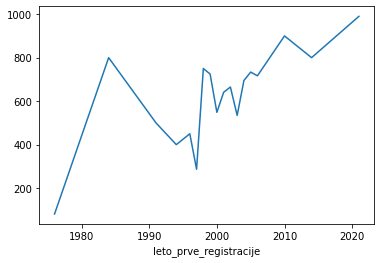

In [6]:
studentski_avti.groupby("leto_prve_registracije").mean()["cena"].plot()

In [18]:
studentski_avti[(studentski_avti.leto_prve_registracije > 1981) & (studentski_avti.leto_prve_registracije < 1990)][["ime_avtomobila", "leto_prve_registracije", "cena"]]

,ime_avtomobila,leto_prve_registracije,cena
808,Volkswagen Golf GL D,1984,800


Večji odmik se pojavi samo pri avtih iz osemdesetih. Ob dodatnem vpogledu lahko vidimo, da je le en primer avtomobila iz tega časovnega obdobja, zato iz tega ne moremo sklepati, da bi bili morda avtomobili iz tega časa več vredni. V povprečju torej velja predpostvaka o korelaciji med starostjo in ceno avtomobilov. 

Študent si gotovo želi največ več avta za svoj denar. Denimo, da je rojen leta 2000 in si ne želi avtomobila starejšega od sebe. V želji po boljši ohranjenosti pa si ogleduje le avtomobile z manj kot 200 000 prevoženimi kilometri.

In [45]:
boljsa_studentska_izbira = studentski_avti[(studentski_avti.leto_prve_registracije > 2000) & (studentski_avti.prevozeni_kilometri < 200000)]
boljsa_studentska_izbira.sort_values(["cena", "leto_prve_registracije"], ascending=[True, True])

,ime_avtomobila,znamka,leto_prve_registracije,prevozeni_kilometri,vrsta_motorja,vrsta_menjalnika,velikost_motorja,moc_motorja,cena
556,Opel Corsa Cosmo 1.4 16V Easytronic,Opel,2006,105000,bencinski motor,ročni menjalnik,1364,66,300
577,Peugeot 106 XN Pack,Peugeot,2001,110000,bencinski motor,ročni menjalnik,1124,44,505
303,Citroen Xsara 2.0 HDi Exclusive,Citroen,2003,195600,diesel motor,ročni menjalnik,1997,66,530
552,Opel Corsa Comfort 1.2 16V Easytronic prvilast...,Opel,2002,128000,bencinski motor,ročni menjalnik,1199,55,550
553,Opel Corsa Comfort 1.2 16V prvi lastnik samo12...,Opel,2002,128000,bencinski motor,ročni menjalnik,1199,55,550
...,...,...,...,...,...,...,...,...,...
822,Volkswagen Golf Variant 2.0 TDI BMT Highline D...,Volkswagen,2014,175532,diesel motor,avtomatski menjalnik,1968,110,800
759,Toyota Yaris 1.3 VVT-i Sol,Toyota,2003,184000,bencinski motor,ročni menjalnik,1298,64,850
324,Fiat Punto 1.2 16V Dynamic,Fiat,2004,183000,bencinski motor,ročni menjalnik,1242,59,850
545,Opel Corsa,Opel,2006,190000,bencinski motor,ročni menjalnik,1229,59,900


<AxesSubplot:xlabel='znamka'>

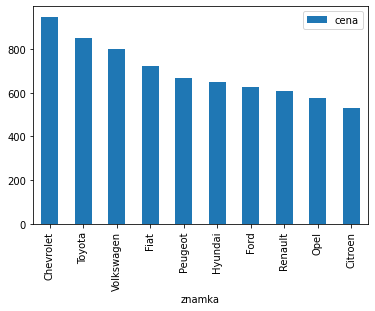

In [103]:
boljsa_studentska_izbira.groupby("znamka").mean().sort_values("cena", ascending=[False]).plot.bar(y="cena")

In [80]:
boljsa_studentska_izbira.znamka.nunique()

10

Ob teh pogojih ima študent na voljo osemnajst avtomobilov desetih znamk. Pri tem se bo finančno rezerviran študent odločil za Citroena, Chevrolet pa bo izbira tistega, ki ima nekoliko več denarja. 

Poglejmo si še kakšen je povprečen avto, ki ga lahko pričakuje kupec za manj kot 1000€.
TODO

2      340000
5      363524
15     245000
35     150300
82     269000
        ...  
808    200000
822    175532
831     51000
837    321000
858    300000
Name: prevozeni_kilometri, Length: 78, dtype: int64

## 2. Primerjava bencin/dizel

Ob nakupu avtomobila se lahko izbere različne vrste motorja. Včasih je bil v uporabi predvsem bencinski motor, v zadnjih desetletjih pa se mu je na vrhu lestvice popularnosti pridružil dizelski motor. Na trgu so tudi druge različice, kot na primer avtomobili na električni pogon in pa hibridna vozila, a so le te vsaj zankrat v manjšini.

<AxesSubplot:xlabel='vrsta_motorja'>

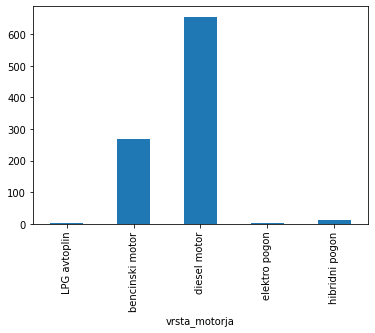

In [6]:
avtomobili_motor = avti.groupby("vrsta_motorja")
avtomobili_motor.size().plot.bar(x="vrsta_motorja", y=avtomobili_motor.size())

V skladu z zgoraj napisanim so tudi rabljeni avtomobili na [avto.net](https://www.avto.net/) v večini primerov opremljeni bodisi z bencinskim bodisi z dizlovim motorjem, ki ga ima največ avtomobilov. Posledično je smiselno ti dve vrsti motorja primerjati in se vprašati, kateri motor je za kupca boljša izbira.
Dizelski motor je v primerjavi z bencinskim smatran za primernejšega za daljše razdalje, veliko prevoženih kilometrov in običajno velja za nekoliko dražjega. Dolgi kilometri na cesti naj bi se bolj izplačali z dizlovim motorjem, saj je za dizel ponavadi potrebno odšteti precej manj kot za bencin. Potrebno pa je omeniti, da je v času posledic ki jih je Covid-19 pustil na svetovnom gospodarstvu, ta razlika v ceni zanemarljiva oziroma je bencin še cenejši (1,074€ / 1,124€ - iz dne 2.2.2021, vir: [AMZS](https://www.amzs.si/na-poti/cene-goriv-po-evropi)). Na ceno dizla močno vpliva tudi okoljevarstvena politika, a se v to ne bomo spuščali, saj to ni tema tukajšnje analize.

Primerjajmo torej rabljene avtomobile z dizlovim in bencinskim motorjem, ki jih je moč kupiti na [avto.net](https://www.avto.net/Ads/results.asp?znamka=&model=&modelID=&tip=&znamka2=&model2=&tip2=&znamka3=&model3=&tip3=&cenaMin=0&cenaMax=999999&letnikMin=0&letnikMax=2090&bencin=0&starost2=999&oblika=&ccmMin=0&ccmMax=99999&mocMin=&mocMax=&kmMin=0&kmMax=9999999&kwMin=0&kwMax=999&motortakt=&motorvalji=&lokacija=0&sirina=&dolzina=&dolzinaMIN=&dolzinaMAX=&nosilnostMIN=&nosilnostMAX=&lezisc=&presek=&premer=&col=&vijakov=&EToznaka=&vozilo=&airbag=&barva=&barvaint=&EQ1=1000000000&EQ2=1000000000&EQ3=1000000000&EQ4=100000000&EQ5=1000000000&EQ6=1000000000&EQ7=1000100020&EQ8=1010000001&EQ9=100000000&KAT=1010000000&PIA=&PIAzero=&PSLO=&akcija=&paketgarancije=0&broker=&prikazkategorije=&kategorija=&ONLvid=&ONLnak=&zaloga=10&arhiv=&presort=&tipsort=&stran=).

Za začetek si oglejmo povprečno ceno avta glede na motor.

<AxesSubplot:xlabel='vrsta_motorja'>

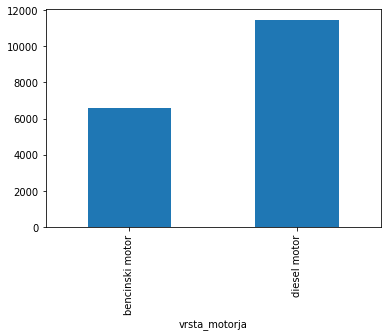

In [152]:
izbrana_motorja = avti[(avti.vrsta_motorja == "bencinski motor") | (avti.vrsta_motorja == "diesel motor")].groupby("vrsta_motorja")
izbrana_motorja.cena.mean().round().plot.bar(x = "vrsta_motorja", y = izbrana_motorja.cena)

Podajmo še primerjavo glede na povprečno prevoženo razdaljo v kilometrih.

<AxesSubplot:xlabel='vrsta_motorja'>

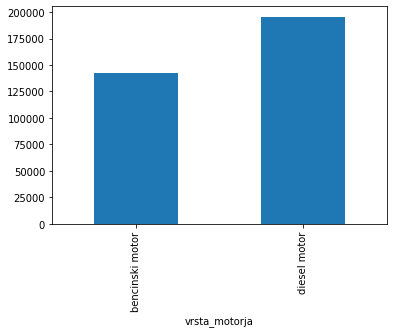

In [155]:
izbrana_motorja.prevozeni_kilometri.mean().round().plot.bar(x = "vrsta_motorja", y = izbrana_motorja.prevozeni_kilometri)

Na zadnje dodajmo še primerjavo povprečnih starosti avtomobilov (oz. leto registracije) glede na motor.

<AxesSubplot:xlabel='vrsta_motorja'>

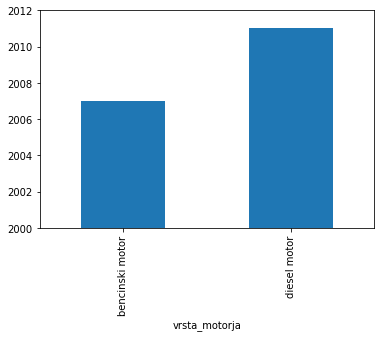

In [163]:
izbrana_motorja.leto_prve_registracije.mean().round().plot.bar(x = "vrsta_motorja", y = izbrana_motorja.leto_prve_registracije, ylim=(2000, 2012))

Kot vidimo iz grafov predpostavke o ceni in prevoženi razdalji držijo. Prav tako lahko vidimo, da so bencinski avtomobili v povprečju starejši, kar lahko pripišemo popularizaciji dizlovih motorjev v zadnjem desetletju.

Očitno opazimo, da je razlika v povprečni ceni med motorjema ogromna, skoraj dvakratna, zato je smotrno upoštevati še dodatne parametre, ki igrajo vlogo pri gibanju cen in s tem dobiti realnejšo sliko o cenovni razliki med "bencincem" in "dizlom". To so vrsta menjalnika, velikost in moč motorja, število prevoženih kilometrov in pa seveda starost avtomobila, ki jo bomo za potrebe analize enačili s pretečenim časom od prve registracije.

## 3. Najugodnejša znamka

Želimo ugotoviti, katera znamka novejših avtomobilov je cenovno ugodnejša, upoštevajoč število prevoženih kilometrov.

Najprej si poglejmo povprečno cenovno sliko.


<AxesSubplot:xlabel='znamka'>

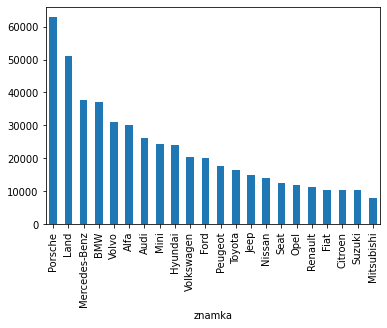

In [8]:
novejsi_avti = avti[avti.leto_prve_registracije > 2016]
novejsi_avti.groupby("znamka").mean()["cena"].sort_values(ascending=[False]).plot.bar()

Pričakovano so tudi med rabljenimi avti-starimi manj kot 5 let-najdražje nekatere elitne firme, kot na primer BMW, Mercedes-Benz, Land-Rover in Porsche, med cenovno ugodnejšimi pa najdemo znamke kot so Mitsubishi, Suzuki, Citroen, Fiat ipd. 

<AxesSubplot:xlabel='prevozeni_kilometri', ylabel='cena'>

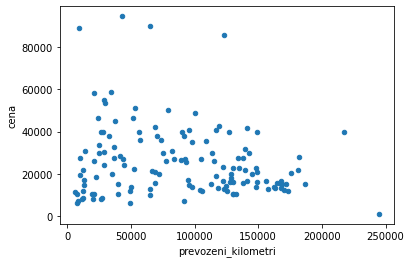

In [98]:
novejsi_avti.plot.scatter(x = "prevozeni_kilometri", y = "cena")

Prevožena razdalja vpliva na ceno avtomobila, zato jo bomo upoštevali pri primerjavi cen različnih znamk. Definirajmo ugodnost nakupa avtomobila glede na razmerje med prevozenimi kilometri in ceno.

In [10]:
avti["ugodnost"] = (10 ** 10) / (avti.prevozeni_kilometri * avti.cena)

In [27]:
novejsi_avti.sort_values("ugodnost", ascending = [False] )[["ime_avtomobila", "znamka", "ugodnost"]]

,ime_avtomobila,znamka,ugodnost
709,Renault Twingo SCe 70°°samo 7.500 km°°1.lastnik°°,Renault,222.259265
488,Mercedes-Benz GLC coupe GLC Coupé 220 d 4MATIC...,Mercedes-Benz,169.402517
762,Toyota Yaris 1.5 VVT-iE Sol,Toyota,147.333991
738,Suzuki Ignis 1.2 VVT Hybrid Comfort,Suzuki,129.442717
708,Renault Twingo SCe 70 Limited-samo 11500km-nav...,Renault,105.529759
...,...,...,...
122,BMW M5 xDrive Avt.-KARBON-DVD-LED-20COL-KAMERA...,BMW,1.709592
233,BMW serija X5: xDrive40d Avt.M.PAKET.LED.ACC.K...,BMW,1.695863
621,Porsche Cayenne 3.0 D V6-LED-PARK-PANORAMA-USN...,Porsche,1.678272
234,BMW serija X5: xDrive40e Avt.,BMW,1.159319


<AxesSubplot:xlabel='znamka'>

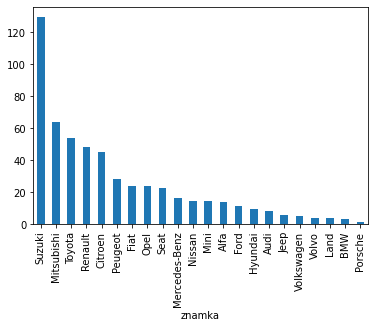

In [109]:
novejsi_avti.groupby("znamka").mean().sort_values("ugodnost", ascending=[False]).ugodnost.plot.bar()

In [120]:
novejsi_avti.groupby("znamka").mean().sort_values("ugodnost", ascending=[False])[["ugodnost"]].head(5)

,ugodnost
znamka,
Suzuki,129.442717
Mitsubishi,63.522998
Toyota,53.756216
Renault,48.249816
Citroen,45.017061


In [121]:
novejsi_avti.groupby("znamka").mean().sort_values("ugodnost", ascending=[False])[["ugodnost"]].tail(5)

,ugodnost
znamka,
Volkswagen,4.895285
Volvo,3.924768
Land,3.699593
BMW,3.404770
Porsche,1.312420


Komentirajmo dobljeno. Suzuki je po našem merilu ugodnosti zagotovo najboljša izbira. Kot kaže ga je v vrh izstrelilo prav zelo nizko povprečno število prevoženih kilometrov, saj v tabeli cene po znamkah vidimo, da ni absolutno najcenejša izbira. 

Med ugodnejšimi avtomobili, navkljub upoštevanju prevoženih kilometrov, najdemo znamke z nižjo ceno npr. Suzuki, Mitsubishi, Renault, med manj ugodnimi pa so tisti z visoko ceno, BMW, Land-Rover, Porsche. Na njihovo ugodnost torej prevožena razdalja ni močno vplivala. Hkrati lahko opazimo, da pride med grafoma znamke/cena in znamke/ugodnost do razlik. To so tisti avtomobili pri katerih stevilo opravljenih kilometrov igra večjo vlogo pri ugodnosti. Toyota denimo, ki je cenovno nekje v povprečju, se pri ugodnosti povzpne na tretje mesto. Mercedes - Benz, ki je seveda dražji rang avtomobila, pa pri ugodnosti pade v sredino.

Za konec si poglejmo še najugodnejše znamke in primer avtomobila na primeru kupca, ki išče srednje rabljen novejši avto z ročnim menjalnikom. 


In [146]:
najugodnejsi = novejsi_avti[(novejsi_avti.prevozeni_kilometri < 200001) & (novejsi_avti.vrsta_menjalnika == "ročni menjalnik")]
najugodnejsi.groupby("znamka").mean().sort_values("ugodnost", ascending=[False])[["ugodnost"]].head(5)

,ugodnost
znamka,
Suzuki,129.442717
Toyota,78.253310
Mitsubishi,63.522998
Renault,62.201675
Mercedes-Benz,50.189145


In [154]:
najugodnejsi[najugodnejsi.znamka == "Suzuki"].sort_values("ugodnost", ascending=[False]).head(1)

,ime_avtomobila,znamka,leto_prve_registracije,prevozeni_kilometri,vrsta_motorja,vrsta_menjalnika,velikost_motorja,moc_motorja,cena,ugodnost
738,Suzuki Ignis 1.2 VVT Hybrid Comfort,Suzuki,2020,7537,bencinski motor,ročni menjalnik,1242,66,10250,129.442717


In [155]:
najugodnejsi[najugodnejsi.znamka == "Mercedes-Benz"].sort_values("ugodnost", ascending=[False]).head(1)

,ime_avtomobila,znamka,leto_prve_registracije,prevozeni_kilometri,vrsta_motorja,vrsta_menjalnika,velikost_motorja,moc_motorja,cena,ugodnost
436,Mercedes-Benz B-Razred B 160 Style KAMERA LED ...,Mercedes-Benz,2020,10223,bencinski motor,ročni menjalnik,1332,80,19490,50.189145


Ponovno na seznamu ugodnejših vidimo firme, ki so bile najugodnejše tudi med splošnimi novejšimi avtomobili. Izjema je spet znamka Mercedes-Benz, ki je v danih pogojih na 5. mestu po ugodnosti. Sklepamo lahko, da imajo avti Mercedes nižjo ceno kot avti drugih firm z istim rangom prevoženih kilometrov, t.j. manj kot 200 000 km.

Primer avtomobilov, ki bi utegnila zanimati našega kupca sta praktično nov **Suzuki Ignis** letnik 2020, izpostavimo pa še **Mercedeza 160 B**, prav tako letnik 2020, ki je sicer več vožen in skoraj dvakrat dražji, torej manj ugoden, a je kljub temu odlična izbira za nekoga, ki si ogleduje bolj priznane znamke.

# 4. Napoved cene

Imamo kupca z vizijo svojega bodočega avtomobila na strani [avto.net](https://www.avto.net/). To je torej tak kupec, ki vsaj približno ve katere znamke avtomobil išče, koliko starega, s kakšnim menjalnikom, s koliko konji ipd. Ali lahko napišemo program, ki mu bo, ob danih željah o lastnostih avtomobila, pomagal določiti okvirno ceno, ki jo lahko pričakuje oziroma povprečno ceno za avto s takimi karakteristika?

Za začetek moramo vsako od lastnosti razdeliti v razrede. Smiselno je namreč enačiti podobno število opravljenih kilometrov, podobno velikost/moč motorja itd. Za leto registracije na primer, bomo avtomobile razdelili v petletja. Storimo enako še za ostale lastnosti avtov, velikost razredov določimo tako, da je smiselna za dano lastnost.

In [93]:
def razresi_velikost(x):
    if type(x) == float:
        return 0
    else:
        return int(x)

avti.velikost_motorja = avti.velikost_motorja.apply(razresi_velikost)

In [102]:
avti["razred_kilometrov"] = 100000 * round(avti.prevozeni_kilometri / 100000)
avti["razred_velikosti_motorja"] = 500 * round(avti.velikost_motorja / 500)
avti["razred_moci_motorja"] = 25 * round(avti.moc_motorja / 25)
avti["razred_leta_registracije"] = 5 * round(avti.leto_prve_registracije / 5)

In [103]:
avti_po_razredih = avti[["znamka", "vrsta_motorja", "vrsta_menjalnika", "razred_kilometrov", "razred_velikosti_motorja", "razred_moci_motorja", "razred_leta_registracije", "cena"]]
avti_po_razredih

,znamka,vrsta_motorja,vrsta_menjalnika,razred_kilometrov,razred_velikosti_motorja,razred_moci_motorja,razred_leta_registracije,cena
0,Abarth,bencinski motor,ročni menjalnik,100000.0,1500.0,100.0,2010.0,9650
1,Alfa,diesel motor,ročni menjalnik,200000.0,2000.0,75.0,2005.0,1500
2,Alfa,diesel motor,ročni menjalnik,300000.0,2000.0,75.0,2005.0,350
3,Alfa,diesel motor,ročni menjalnik,200000.0,2000.0,100.0,2005.0,1790
4,Alfa,diesel motor,ročni menjalnik,300000.0,2000.0,75.0,2005.0,1250
...,...,...,...,...,...,...,...,...
930,Volvo,diesel motor,avtomatski menjalnik,200000.0,2500.0,150.0,2015.0,14400
931,Volvo,diesel motor,avtomatski menjalnik,100000.0,2500.0,150.0,2015.0,20999
932,Volvo,diesel motor,ročni menjalnik,200000.0,2000.0,125.0,2015.0,15300
933,Volvo,diesel motor,avtomatski menjalnik,100000.0,2000.0,175.0,2015.0,30900


<AxesSubplot:xlabel='vrsta_menjalnika'>

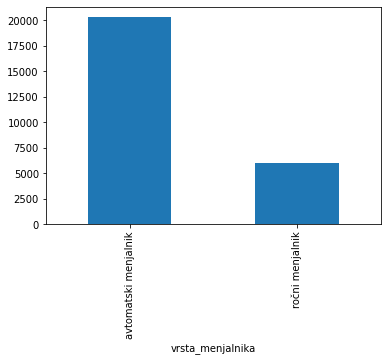

In [88]:
lastnosti = {}
for lastnost in avti_po_razredih.columns:
    lastnosti["{0}".format(lastnost)] = round(avti.groupby(f"{lastnost}").cena.mean())

# slovar povprečnih cen glede na neko lastnost, na primer:
lastnosti.get("vrsta_menjalnika").plot.bar()

In [116]:
avti_po_razredih.columns

Index(['znamka', 'vrsta_motorja', 'vrsta_menjalnika', 'razred_kilometrov',
       'razred_velikosti_motorja', 'razred_moci_motorja',
       'razred_leta_registracije', 'cena'],
      dtype='object')

Sedaj bomo predvidevali, da je povprečna cena avtomobila z danimi karakteristikami enaka povprečju povprečnih cen posamičnih lastnosti.

In [122]:
def okvirna_cena(znamka, prevozeni_kilometri, velikost_motorja, moc_motorja, vrsta_motorja="bencinski_motor", vrsta_menjalnika="ročni_menjalnik", leto_registracije=2010):
    razred_kilometrov =  100000 * round(prevozeni_kilometri / 100000)
    razred_velikosti = 500 * round(velikost_motorja / 500)
    razred_moci = 25 * round(moc_motorja / 25)
    razred_leta = 5 * round(leto_registracije / 5)
    # podatke porazdelimo v razrede
    podatki = [znamka, vrsta_motorja, vrsta_menjalnika, razred_kilometrov, razred_velikosti, razred_moci, razred_leta]
    slovar = {lastnost : vrednost for lastnost, vrednost in zip(avti_po_razredih.columns,podatki)}
    
    cena = sum(lastnost.get(lastnost).vrednost for lastnost, vrednost in slovar) / len(lastnosti)
    
    return cena
